*Fourier Transform Review***
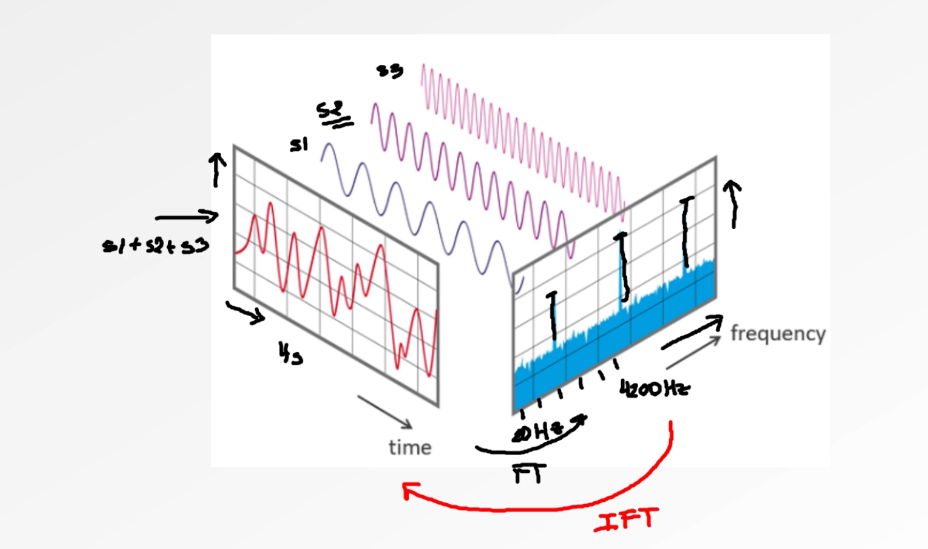

**Demo Using piano Chords**

*Part One Plot Chord Wave*

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import json
from scipy.io import wavfile
#chord_file = !wget -L https://raw.githubusercontent.com/Vankum100/colabs/main/lab_one/output.wav
#print(json.dumps(chord_file))
fs, snd = wavfile.read("/output.wav")

snd = snd / (2.**15)
s1 = snd[:,0]

plt.figure(figsize=(20, 8))
plt.style.use("seaborn")

time = np.arange(0, s1.shape[0], 1)
time = (time / fs) * 1000

plt.plot(time, s1, color='b')

plt.ylabel('Amplitude', fontsize=16)
plt.xlabel('Time (ms)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

*Part Two Plot FFT of Chord Wave*

[329. 330. 415. 555.]


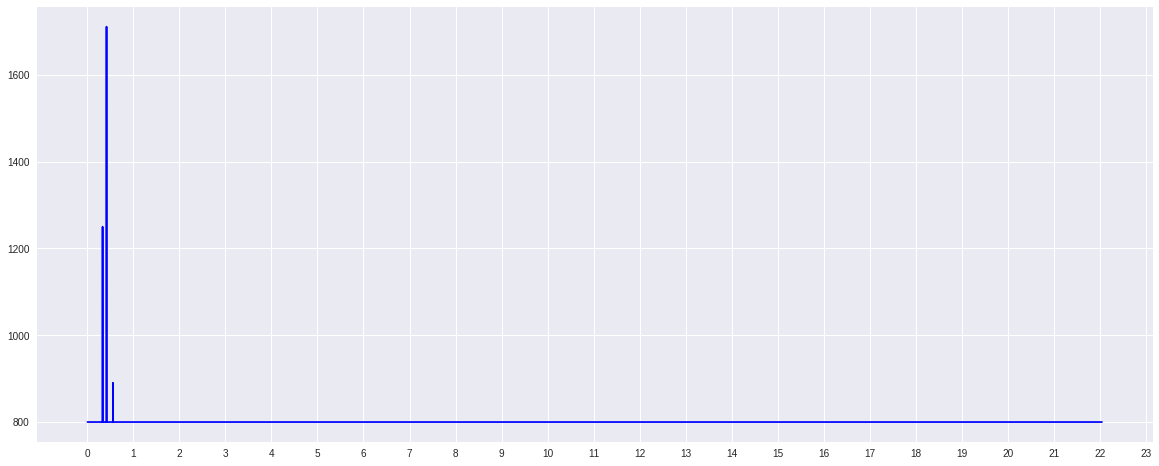

In [18]:


import numpy as np

import matplotlib.pyplot as plt

import math

from scipy.io import wavfile

from numpy.fft import fft

plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.style.use("seaborn")

threshold = 800
fs, snd = wavfile.read("/output.wav")
y = snd[:,0]

plt.figure(figsize=(20, 8))

n = len(y) 
p = fft(y) 

mag = np.sqrt(p.real**2 + p.imag**2)

mag = mag * 2 / n

mag = mag[0:math.ceil((n)/2.0)]

freq = np.arange(0, len(mag), 1.0) * (fs / n)

if threshold != 0:
    print(np.unique(np.rint(freq[np.in1d(mag, mag[mag>threshold])])))
    mag[mag<threshold]=threshold

plt.plot(freq/1000, mag, color='b')
plt.xticks(np.arange(min(freq/1000), max(freq/1000)+1, 1.0))

plt.show()


In [32]:
print('*** Программа вычисления ДПФ гармонического сигнала ***')
import numpy as np
import matplotlib.pyplot as plt
from time import time
from plotly.offline import init_notebook_mode, iplot, plot_mpl
import plotly.graph_objs as go
from IPython.display import display, HTML
from scipy.optimize import minimize

init_notebook_mode(connected=True)

*** Программа вычисления ДПФ гармонического сигнала ***


In [33]:
t1 = float(input('Введите начало интервала: '))
t2 = float(input('Введите конец интервала: '))
N  = float(input('Введите количество точек: '))

Введите начало интервала: 0
Введите конец интервала: 0.07
Введите количество точек: 128


In [34]:
def discrete_transforms(t1, t2, N, plot):
    f0 = 2000
    mvis= 4
    fdn = 2*f0
    fdv = mvis*fdn
    t   = np.arange(t1, t2, (t2-t1)/N)  # time vector
    y   = np.cos(2*np.pi*f0*t)  # signal vector
    stime = -time()
    # Discrete fourier transform
    k   = np.arange(N)
    Ex  = np.exp(np.complex(0,-1)*2*np.pi/N*np.dot(np.transpose(k),k))
    Y   = y*Ex
    stime = stime + time()
    # Inverse fourier
    Ex  = np.exp(np.complex(0,1)*2*np.pi/N*np.dot(np.transpose(k),k))
    ys  = Y/(N-1)*Ex
    
    Y2  = Y*np.conj(Y)  # square of fourier form module
    ff  = k*fdv/N # frequency vector, Гц
    if plot:
        data = [
            go.Scatter(
                x = ff,
                y = np.real(Y2),
                mode = 'markers+lines',
                marker = dict(color='red', symbol=135)
            )
        ]
        layout = go.Layout(
            xaxis=dict(title='Frequency, Hz'),
            yaxis=dict(title='Fourier-image modulus squared')
            )
        fig = go.Figure(data=data, layout=layout)
        iplot(fig)
        data = [
            go.Scatter(
                x = t,
                y = np.real(y),
                mode = 'markers+lines',
                marker = dict(color='red', symbol=135)
            )
        ]
        layout = go.Layout(
            title = 'Real part',
            xaxis=dict(title='Time, s'),
            yaxis=dict(title='Initial signal')
            )
        fig = go.Figure(data=data, layout=layout)
        iplot(fig)
        data = [
            go.Scatter(
                x = t,
                y = np.imag(y),
                mode = 'markers+lines',
                marker = dict(color='blue', symbol=135)
            )
        ]
        layout = go.Layout(
            title = 'Imaginary part',
            xaxis=dict(title='Time, s'),
            yaxis=dict(title='Initial signal')
            )
        fig = go.Figure(data=data, layout=layout)
        iplot(fig)
        data = [
            go.Scatter(
                x = t,
                y = np.real(ys),
                mode = 'markers+lines',
                marker = dict(color='red', symbol=135)
            )
        ]
        layout = go.Layout(
            title = 'Real part',
            xaxis=dict(title='Time, s'),
            yaxis=dict(title='Restored signal')
            )
        fig = go.Figure(data=data, layout=layout)
        iplot(fig)
        data = [
            go.Scatter(
                x = t,
                y = np.round(np.imag(ys), 5),
                mode = 'markers+lines',
                marker = dict(color='blue', symbol=135)
            )
        ]
        layout = go.Layout(
            title = 'Imaginary part',
            xaxis=dict(title='Time, s'),
            yaxis=dict(title='Restored signal')
            )
        fig = go.Figure(data=data, layout=layout)
        iplot(fig)
    return stime


In [35]:
discrete_transforms(t1, t2, N, True)


0.0009925365447998047

In [36]:
def fast_transforms(t1, t2, N, plot):
    f0 = 2000
    mvis= 4
    fdn = 2*f0
    fdv = mvis*fdn
    t   = np.arange(t1, t2, (t2-t1)/N)  # time vector, с
    y   = np.cos(2*np.pi*f0*t)  # signal vector
    stime = -time()
    # fast fourier transform
    Y   = np.fft.fft(y)

    stime = stime + time()
    # inverse discrtete fourier transform
    
    ys  = np.fft.ifft(Y)
    k   = np.arange(N)
    Y2  = Y*np.conj(Y)  #  square of fourier form module
    ff  = k*fdv/N # freq vector, Гц
    if plot:
        data = [
            go.Scatter(
                x = ff,
                y = np.real(Y2),
                mode = 'markers+lines',
                marker = dict(color='red', symbol=135)
            )
        ]
        layout = go.Layout(
            xaxis=dict(title='Frequency, Hz'),
            yaxis=dict(title='Fourier-image modulus squared')
            )
        fig = go.Figure(data=data, layout=layout)
        iplot(fig)
        data = [
            go.Scatter(
                x = t,
                y = np.real(y),
                mode = 'markers+lines',
                marker = dict(color='red', symbol=135)
            )
        ]
        layout = go.Layout(
            title = 'Real part',
            xaxis=dict(title='Time, s'),
            yaxis=dict(title='Initial signal')
            )
        fig = go.Figure(data=data, layout=layout)
        iplot(fig)
        data = [
            go.Scatter(
                x = t,
                y = np.imag(y),
                mode = 'markers+lines',
                marker = dict(color='blue', symbol=135)
            )
        ]
        layout = go.Layout(
            title = 'Imaginary part',
            xaxis=dict(title='Time, s'),
            yaxis=dict(title='Initial signal')
            )
        fig = go.Figure(data=data, layout=layout)
        iplot(fig)
        data = [
            go.Scatter(
                x = t,
                y = np.real(ys),
                mode = 'markers+lines',
                marker = dict(color='red', symbol=135)
            )
        ]
        layout = go.Layout(
            title = 'Real part',
            xaxis=dict(title='Time, s'),
            yaxis=dict(title='Restored signal')
            )
        fig = go.Figure(data=data, layout=layout)
        iplot(fig)
        data = [
            go.Scatter(
                x = t,
                y = np.round(np.imag(ys), 5),
                mode = 'markers+lines',
                marker = dict(color='blue', symbol=135)
            )
        ]
        layout = go.Layout(
            title = 'Imaginary part',
            xaxis=dict(title='Time, s'),
            yaxis=dict(title='Restored signal')
            )
        fig = go.Figure(data=data, layout=layout)
        iplot(fig)
    return stime

In [37]:
fast_transforms(t1, t2, N, True)

5.888938903808594e-05

In [38]:
times1 = []
times2 = []
for i in range(15, 20, 1):
    times1.append((task1(t1, t2, 2**i, False)))
    times2.append((task2(t1, t2, 2**i, False)))


In [39]:
data = [
    go.Scatter(
        x = list(range(15, 20, 1)),
        y = times1,
        mode = 'markers+lines',
        marker = dict(color='blue', symbol=135),
        name = 'DFT'
    ),
    go.Scatter(
        x = list(range(15, 20, 1)),
        y = times2,
        mode = 'markers+lines',
        marker = dict(color='red', symbol=135),
        name = 'FFT'
    )
]
layout = go.Layout(
    xaxis=dict(title='Log(Data size)'),
    yaxis=dict(title='Time, s')
    )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [44]:
def sigmoid_activation(v, a):
    y = 1/(1+np.exp(-a*v))
    data = [
        go.Scatter(
            x = v,
            y = y,
            mode = 'markers+lines',
            marker = dict(color='blue', symbol=135)
        )
    ]
    fig = go.Figure(data=data)
    iplot(fig)

In [45]:
input_vector=np.arange(0, 10, 0.1)
sigmoid_activation(v, 5)

In [46]:
def tanh_activation(v, a):
    y = np.tanh(v/a)
    data = [
        go.Scatter(
            x = v,
            y = y,
            mode = 'markers+lines',
            marker = dict(color='blue', symbol=135)
        )
    ]
    fig = go.Figure(data=data)
    iplot(fig)

In [47]:
tanh_activation(input_vector, 5)

In [ ]:
y = 1/(1+np.exp(-5*v))
dy = np.diff(y)

data = [
    go.Scatter(
        x = v,
        y = dy,
        mode = 'markers+lines',
        marker = dict(color='blue', symbol=135)
    )
]
fig = go.Figure(data=data)
iplot(fig)